In [67]:
import numpy as np
#import matplotlib.pyplot as plt
import pylab as plt
from PIL import Image
from mpmath import *

# Chapter 2 - Solution of a single non-linear equation  

## Newton Method
Iterative scheme for Newton method: $$x_n = x_{n-1} -\frac{f(x_n)}{f'(x_{n-1})}$$

Solve $$f(y) = y^3/3- 2y^2 +y-4$$ using the Newton Method. Additionally, try the code with a different stopping condition instead of a fixed number of steps, stop the loop at the step n for which $|f(x_n)| < 10^{−10}$ (thus when we are indeed very near to a zero).


In [23]:
def f(y):
    return y**3/3-2*(y**2)+y-4

def df(y):
    return y**2-4*y+1

def newton(f, df, x0, n):
    xs=[x0]
    for i in range(n):
        xs.append(xs[-1]-(f(xs[-1])/df(xs[-1])))
    return xs[-1]

newton(f, df, 8.,10)

def newton2(f,df,x0):
    xs=[x0]
    while (True):
        if abs(f(xs[-1]))<10**(-10):
            break
        else:
            xs.append(xs[-1]-(f(xs[-1])/df(xs[-1])))
    return xs[-1]
        
n= 10
x0=8.0
print(f'Newton Method in {n} steps: {newton(f, df, 8., 10)}')
print(f'Newton Method with f(x_n) near 0: {newton2(f,df,8.0)}')

Newton Method in 10 steps:5.838208095398307
Newton Method with f(x_n) near 0: 5.838208095398307


### Newton Fractal


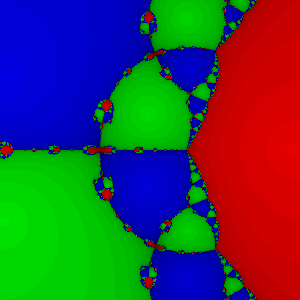

In [33]:
sizex = 300; sizey = 300
image = Image.new("RGB", (sizex,sizey))

xmin=0.0; xmax=6.0
ymin=-3.0; ymax=3.0

roots=[complex(5.83821,0), complex (0.080896 , 1.43139 ),complex (0.080896 ,- 1.43139 )]

for i in range(sizey):
    zy = i * (ymax -ymin)/(sizey-1)+ymin
    for j in range(sizex):
        zx = j * (xmax -xmin)/(sizex-1)+xmin
        z = complex(zx, zy)
        n=0;
        while abs(f(z))> 1/10**10:
            n=n+1;
            z = z - f(z) / df(z)
        if abs(z-roots[0]) < 1/10**5:
            image.putpixel((j, i), (255 - n % 32 * 8 , 0, 0))
        if abs(z-roots[1]) < 1/10**5:
            image.putpixel((j, i), (0 , 255 - n % 32 * 8, 0))
        if abs(z-roots[2]) < 1/10**5:
            image.putpixel((j, i), (0 , 0, 255 - n % 32 * 8))

display(image)   

## Rate and Order of Convergence 

We say the sequence $x_k$ converges with order $q$ to $x^*$ if $$\lim_{k\rightarrow \infty} \frac{|x_{k+1}-x^*|}{|x_{k}-x^*|^q}=\mu$$ for some non-zero rate of convergence $0<\mu<\infty$.


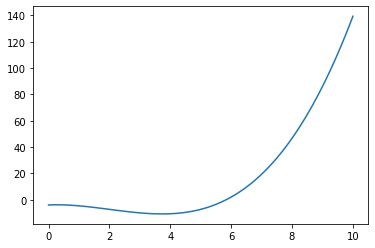

In [43]:
x= np.linspace(0, 10, 100)
y=f(x)
plt.plot(x, y)

## Secant Method
In the Secant method we build a linear approximation of the funtion $f(x)$ instead of using the derivative of $f(x)$ (which sometimes may not be available). $$f(x)\approx \frac{x-x_{n-1}}{x_{n-2}-x_{n-1}}f(x_{n-2})+\frac{x-x_{n-2}}{x_{n-1}-x_{n-2}}f(x_{n-1})$$ which gives 
$$x_n = \frac{x_{n-1}f(x_{n-2})-x_{n-2}f(x_{n-1})}{f(x_{n-2})-f(x_{n-1})}$$

In [44]:
def secant(f,x0, xm1, n):
    x=[xm1,x0]
    for i in range(n):
        x.append((x[-1]*f(x[-2])-x[-2]*f(x[-1]))/(f(x[-2])-f(x[-1])))
    return x[-1]

In [46]:
secant(f, 10.,9.5,10)

5.838208095398306

## Bisection Method


In [63]:
def g(x):
    return x**2-2

def bisection(g,a,b,n):
    for i in range(n):
        c=(a+b)/2
        if abs(g(c))<1/10**10:
            print(f'Found zero at: {c}')
            return c
        if g(a)*g(c)<0:
            a=a
            b=c
        else:
            a=c
            b=b
        print(f'a={a}, b= {b} f(a)= {g(a)}')

In [64]:
bisection(g,0,2,100)

a=1.0, b= 2 f(a)= -1.0
a=1.0, b= 1.5 f(a)= -1.0
a=1.25, b= 1.5 f(a)= -0.4375
a=1.375, b= 1.5 f(a)= -0.109375
a=1.375, b= 1.4375 f(a)= -0.109375
a=1.40625, b= 1.4375 f(a)= -0.0224609375
a=1.40625, b= 1.421875 f(a)= -0.0224609375
a=1.4140625, b= 1.421875 f(a)= -0.00042724609375
a=1.4140625, b= 1.41796875 f(a)= -0.00042724609375
a=1.4140625, b= 1.416015625 f(a)= -0.00042724609375
a=1.4140625, b= 1.4150390625 f(a)= -0.00042724609375
a=1.4140625, b= 1.41455078125 f(a)= -0.00042724609375
a=1.4140625, b= 1.414306640625 f(a)= -0.00042724609375
a=1.4141845703125, b= 1.414306640625 f(a)= -8.200109004974365e-05
a=1.4141845703125, b= 1.41424560546875 f(a)= -8.200109004974365e-05
a=1.4141845703125, b= 1.414215087890625 f(a)= -8.200109004974365e-05
a=1.4141998291015625, b= 1.414215087890625 f(a)= -3.8843369111418724e-05
a=1.4142074584960938, b= 1.414215087890625 f(a)= -1.726433401927352e-05
a=1.4142112731933594, b= 1.414215087890625 f(a)= -6.474772817455232e-06
a=1.4142131805419922, b= 1.41421508789

1.4142135623842478

## Numerically estimating convergence orders

In [114]:
# Setting precision
mp.dps = 100
print(pi)

x0=8.
xm1=7.5

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068


In [115]:
def h(x):
    return (x**2)-3

def dh(x):
    return 2*x

def newtonHP(f,df,x0,precision):
    n=0
    x=[mpf(x0)]
    while (abs(f(x[-1])))>10**(-precision) and (n<100):
        n=n+1
        x.append(x[-1]-f(x[-1])/df(x[-1]))
    return x

def secantHP(f,x0, xm1, precision):
    n=0
    x=[mpf(xm1),mpf(x0)]
    while (abs(f(x[-1])))>10**(-precision) and (n<100):
        n=n+1
        x.append((x[-1]*f(x[-2])-x[-2]*f(x[-1]))/(f(x[-2])-f(x[-1])))
    return x

To verify the quadratic convergence rate of the Newton method we compute the number of exact digits as $\log_{10} |x_n − x^*|$ and divide it by $2^n$ and plot the result.  
We use $f(x)=x^2-3$ as a simple example, so we know the exact $x^*=\sqrt 3$.

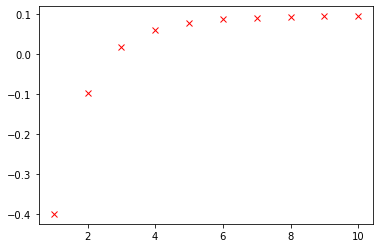

In [129]:
result = newtonHP(h,dh,x0,50)

numberOfDigitsOverqSquare=[]
ns= []
n= 0
for x in result:
    n=n+1
    ns.append(n)
    numberOfDigitsOverqSquare.append(float(-log(abs(x-3**mpf(0.5)))/log(10))/2**n)

plt.plot(ns,numberOfDigitsOverqSquare ,"rx"); 
plt.show()

Here we see that $$\lim_{n\rightarrow\infty}\frac{\log|x_n-x^*|}{q^n} = \text{const}$$ with $q=2$ which implies quadratic convergence rate.

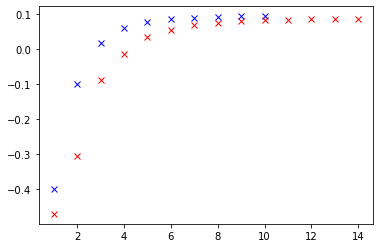

In [130]:
result2 = secantHP(h,x0,xm1,50)

numberOfDigitsOverqSquare2=[]
ns2= []
n2= 0
for x in result2:
    n2=n2+1
    ns2.append(n2)
    numberOfDigitsOverqSquare2.append(float(-log(abs(x-3**mpf(0.5)))/log(10))/1.6180**n2)

plt.plot(ns2,numberOfDigitsOverqSquare2 ,"rx");
plt.plot(ns,numberOfDigitsOverqSquare ,"bx");
plt.show()

## Questions

**Question 1** Solve $x^3=2$ with Newton method using $x_0=1$.Print the result of the iterations 


In [3]:
def y(x):
    return x**3 -2

def dy(x):
    return 3*(x**2)

def newtonq1(f, df, x0, n):
    xs=[x0]
    for i in range(n):
        xs.append(xs[-1]-(f(xs[-1])/df(xs[-1])))
        print(f'x{i} = {xs[-1]}, fx{i} = {f(xs[-1])}, dfx{i} = {df(xs[-1])}')
    return xs[-1]
x0=1
newtonq1(y, dy, x0, 10)

x0 = 1.3333333333333333, fx0 = 0.3703703703703698, dfx0 = 5.333333333333333
x1 = 1.2638888888888888, fx1 = 0.018955225480109306, dfx1 = 4.79224537037037
x2 = 1.259933493449977, fx2 = 5.925932265471445e-05, dfx2 = 4.76229722375119
x3 = 1.2599210500177698, fx3 = 5.852585083232498e-10, dfx3 = 4.762203156833638
x4 = 1.2599210498948732, fx4 = 0.0, dfx4 = 4.762203155904599
x5 = 1.2599210498948732, fx5 = 0.0, dfx5 = 4.762203155904599
x6 = 1.2599210498948732, fx6 = 0.0, dfx6 = 4.762203155904599
x7 = 1.2599210498948732, fx7 = 0.0, dfx7 = 4.762203155904599
x8 = 1.2599210498948732, fx8 = 0.0, dfx8 = 4.762203155904599
x9 = 1.2599210498948732, fx9 = 0.0, dfx9 = 4.762203155904599


1.2599210498948732